# Rainfall Weather Forecasting
### Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
#### 1. Problem Statement: 
1. Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
2. Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


### Dataset Description:
Number of columns: 23


* Date  - The date of observation
* Location  -The common name of the location of the weather station
* MinTemp  -The minimum temperature in degrees celsius
* MaxTemp -The maximum temperature in degrees celsius
* Rainfall  -The amount of rainfall recorded for the day in mm
* Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine  -The number of hours of bright sunshine in the day.
* WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am -Direction of the wind at 9am
* WindDir3pm -Direction of the wind at 3pm
* WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am -Humidity (percent) at 9am
* Humidity3pm -Humidity (percent) at 3pm
* Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am - Fraction of sky obscured by cloud at 9am. 
* Cloud3pm -Fraction of sky obscured by cloud 
* Temp9am-Temperature (degrees C) at 9am
* Temp3pm -Temperature (degrees C) at 3pm
* RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
#importing basic libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("weather.csv")

In [3]:
print(df.shape)
df

(8425, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Observation :
1. This dataset contains 8425 records and 23 columns..
2. Target variable is RainTomorrow
3. We also need to find how much rainfall could be there. so Rainfall in our second target variable.
4. In this case we have both classification and regression problem. 

In [4]:
df.columns 

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

### Observation:
1. Object columns are Date,Location, WindGustDir,WindDir9am,WindDir3pm,RainToday and RainTomorrow.
2. Rest are the numerical columns.
3. We can see some null values in the dataset.



In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

### Observation :
* Except Date and Location columns all columns have missing values.

In [7]:
# Let's Seperate the numerical and categorical features
numerical = [features for features in df.columns if df[features].dtypes != 'O']
print(numerical)
print("\n")
print("number of Numerical columns :",len(numerical))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


number of Numerical columns : 16


In [8]:
categorical = [features for features in df.columns if df[features].dtypes == 'O']
print(categorical)
print("\n")
print("Number of categorical columns :",len(categorical))

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Number of categorical columns : 7


* since we have 10 years daily weather data so we no need to take date column. we will drop that.
* Also the Location is not required to predict the rainTomorrow

In [9]:
df.drop(['Date','Location'], axis = 1, inplace = True)

In [10]:
df.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [11]:
null_values = df.isnull().sum().sort_values(ascending = False)
pct_of_null = (df.isnull().sum()/len(df))*100
pd.concat([null_values,pct_of_null],axis = 1,keys = ['Null_values','Percentage null values %'])

,Null_values,Percentage null values %
Sunshine,3994,47.406528
Evaporation,3512,41.685460
Cloud3pm,2455,29.139466
Cloud9am,2421,28.735905
Pressure3pm,1312,15.572700
Pressure9am,1309,15.537092
WindGustDir,991,11.762611
WindGustSpeed,991,11.762611
WindDir9am,829,9.839763
WindDir3pm,308,3.655786


### Observation :
1. he Festure sunshine has 47.41 % missing values.

In [12]:
df.drop('Sunshine',axis = 1 , inplace = True)

In [13]:
# Unique values 
categorical = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for i in categorical:
    print(i , df[i].nunique())

WindGustDir 16
WindDir9am 16
WindDir3pm 16
RainToday 2
RainTomorrow 2


In [14]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [15]:
# Now Let's handel the missing  values
col = df.columns

In [16]:
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)


In [17]:
numerical = ['MinTemp','MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
for i in numerical:
    df[i].fillna(df[i].mean(),inplace=True)

In [18]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

###### No More Missing Values.

### EDA

In [19]:
# Disturbation of target variable\
rnfl_values = df.RainTomorrow.value_counts().values
rnfl_labels = df.RainTomorrow.value_counts().index


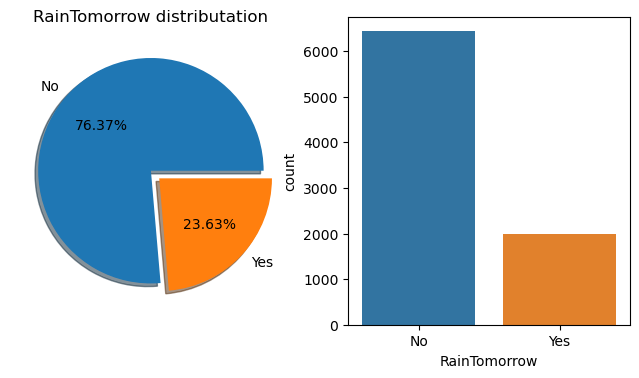

In [20]:
plt.figure(figsize =(8,4),frameon = False)
plt.title('RainTomorrow distributation')
plt.subplot(1,2,1)
plt.pie(rnfl_values,labels = rnfl_labels, autopct = '%1.2f%%',explode=[0,0.1] ,shadow = True)
plt.title('RainTomorrow distributation')
plt.subplot(1,2,2)
sns.countplot(df['RainTomorrow'])
plt.show()

In [21]:
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

### Observation:
1. Here we can see the major gap between the number of yes and no as yes is less as compare to the No.
2.  This data is called as imbalanced dataset

In [22]:
# Creating a function to plot the categorical features
def plot_graph(i):
    plt.figure(figsize = (10,6))
    sns.countplot(x = i,data = df)
    plt.show()

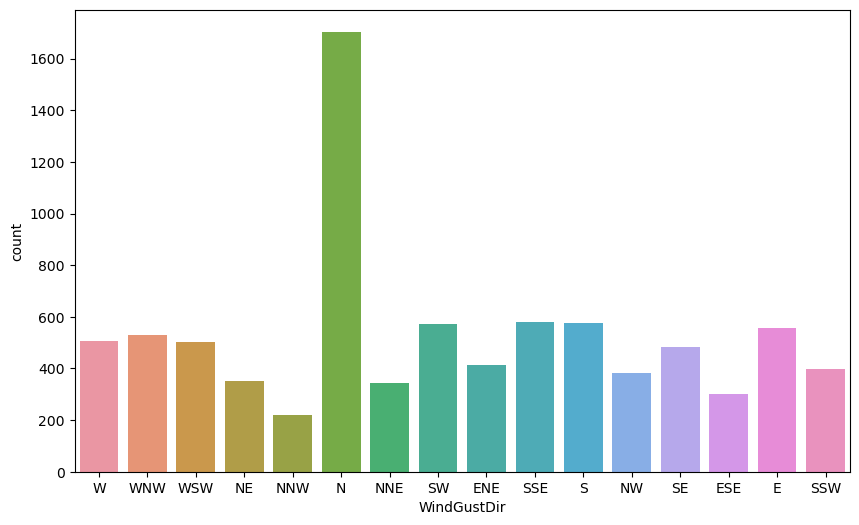

In [23]:
plot_graph('WindGustDir')

### Observation:
1. The direction of the strongest wind gust in the 24 hours to midnight is 1704 times from North.
2. The direction of the strongest wind gust in the 24 hours to midnight is 219 times from NNW.

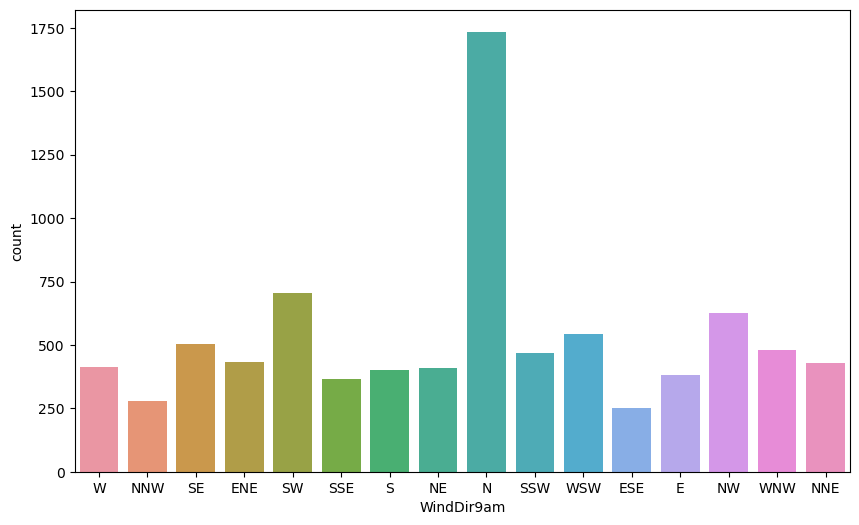

In [24]:
plot_graph('WindDir9am')  

### Observation:
1. Here also the the wind direction at 9am is 1750 times from North.

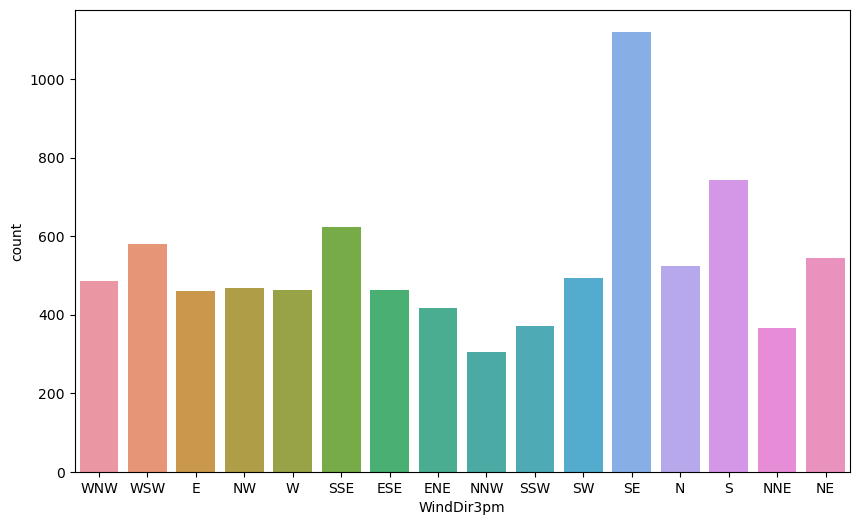

In [25]:
plot_graph('WindDir3pm')

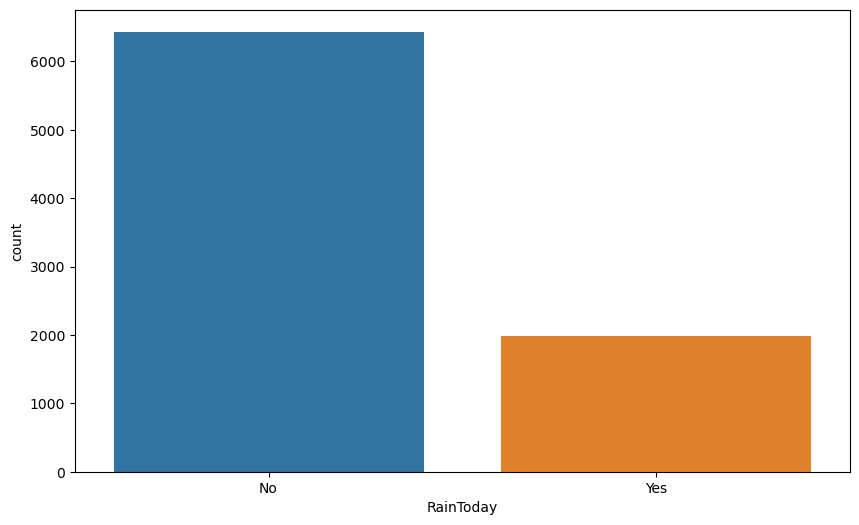

In [26]:
plot_graph('RainToday')

In [27]:
df.RainToday.value_counts()

No     6435
Yes    1990
Name: RainToday, dtype: int64

### Observation :
  * The rain today Yes data is less.

In [28]:
print(numerical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [29]:
def numplot(i):
    plt.figure(figsize=(10,6))
    sns.distplot(df[i])
    plt.show()

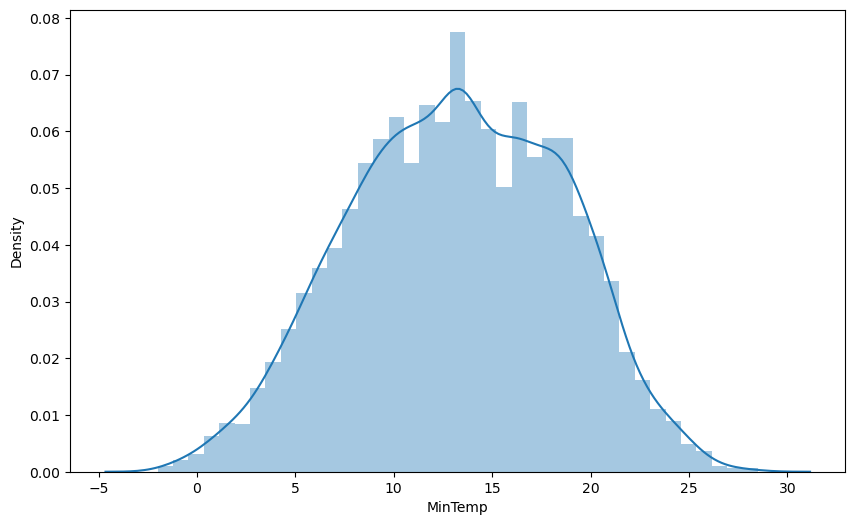

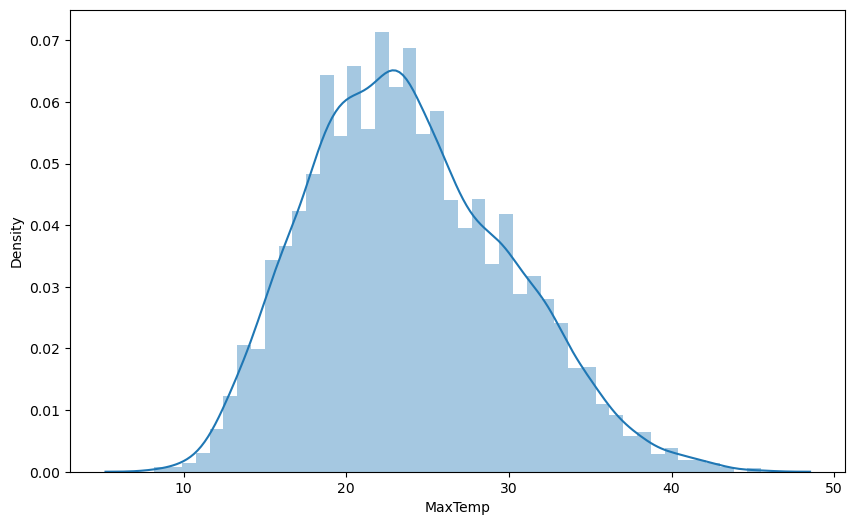

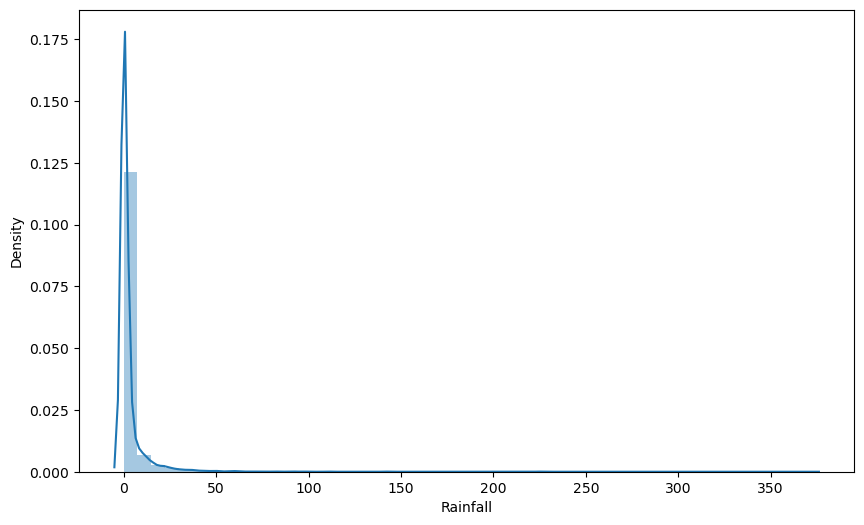

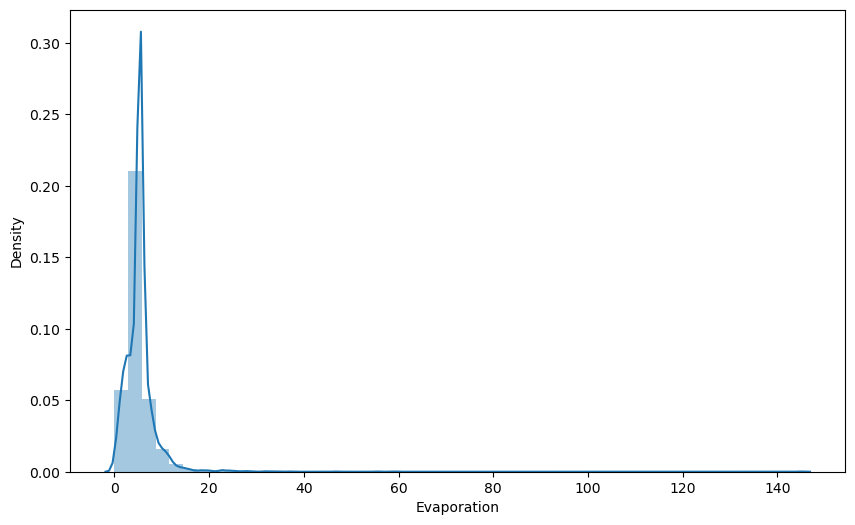

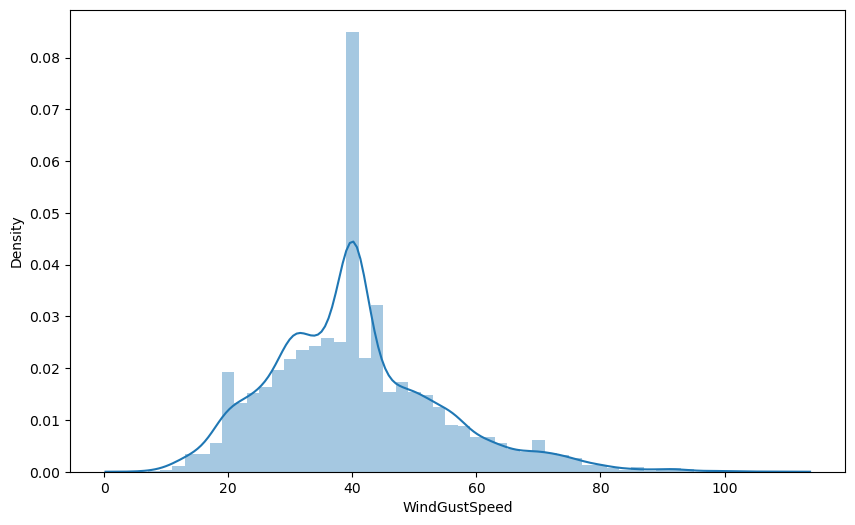

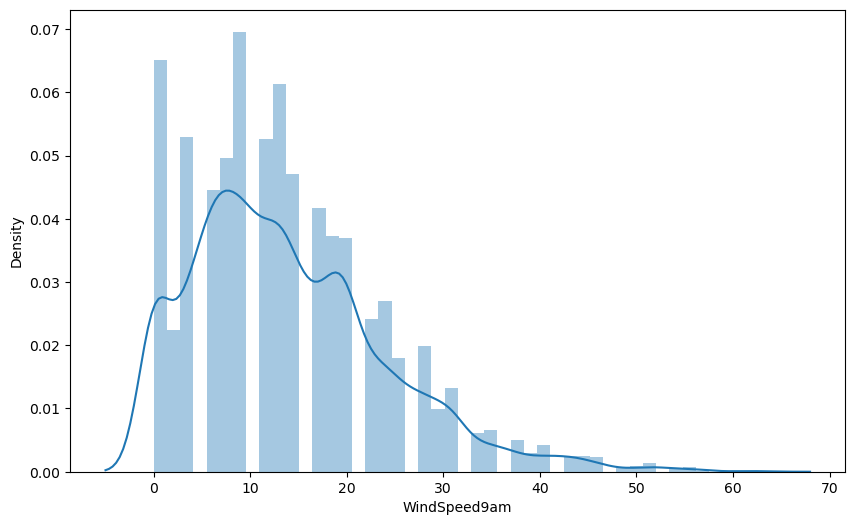

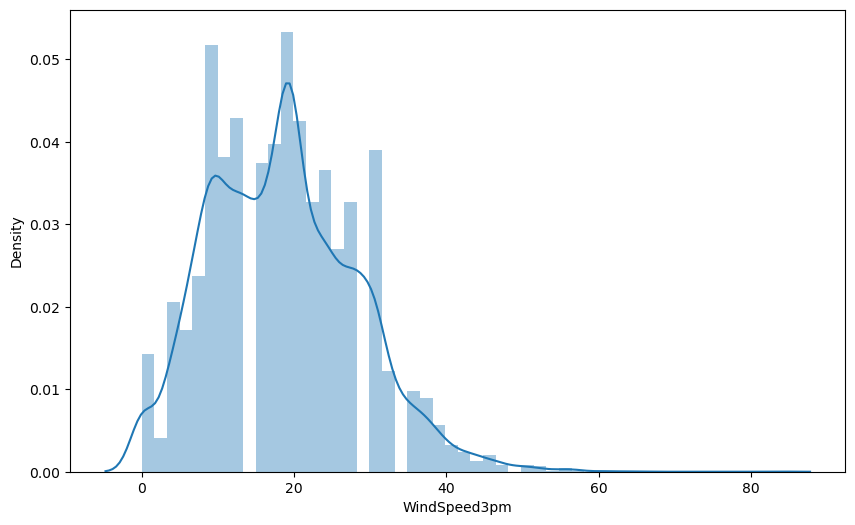

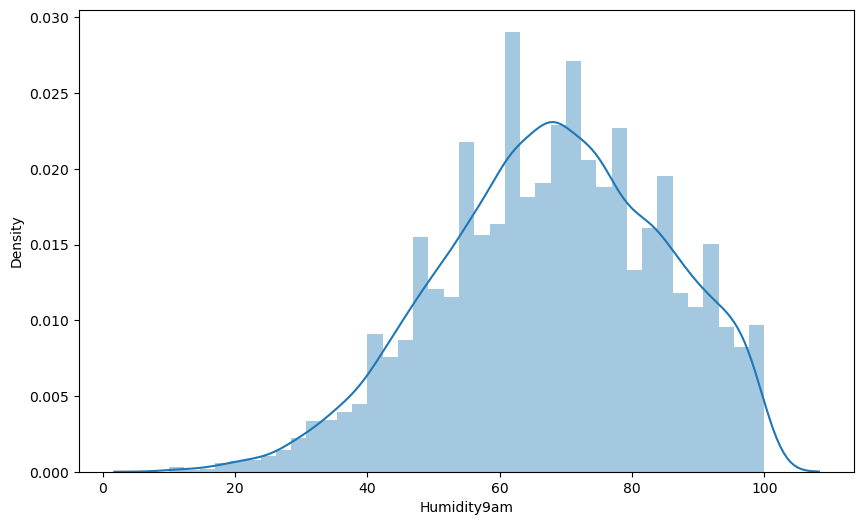

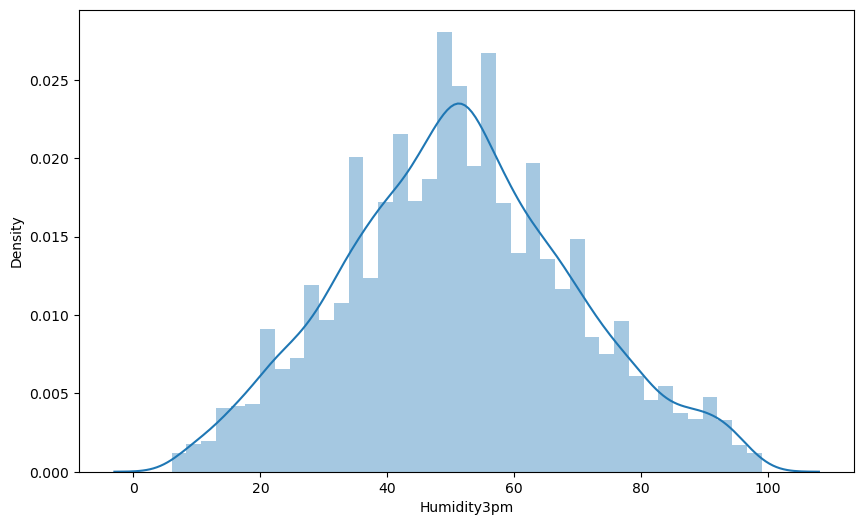

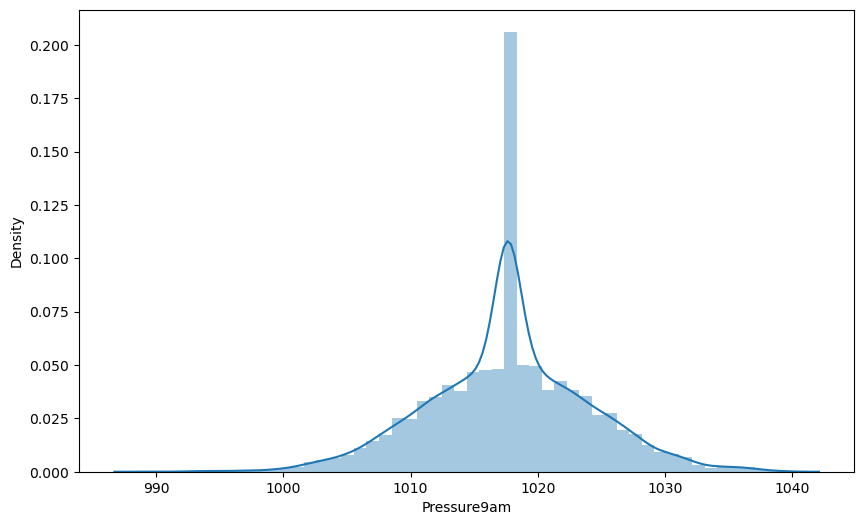

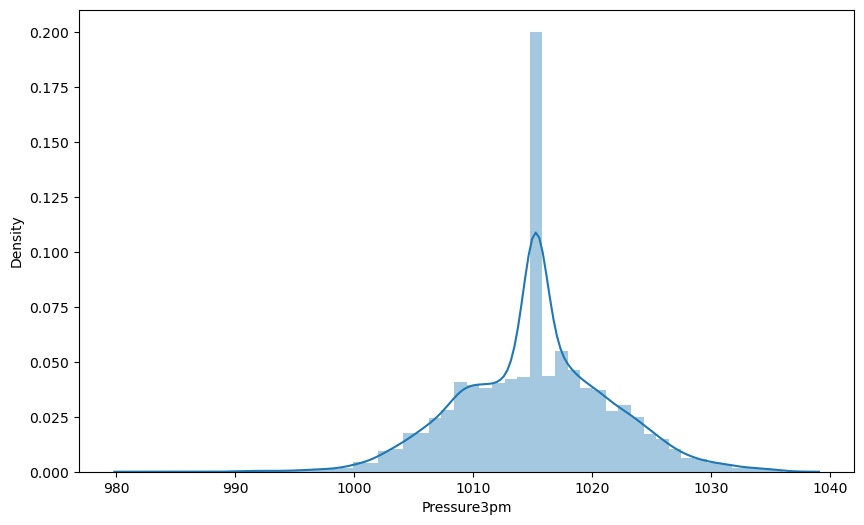

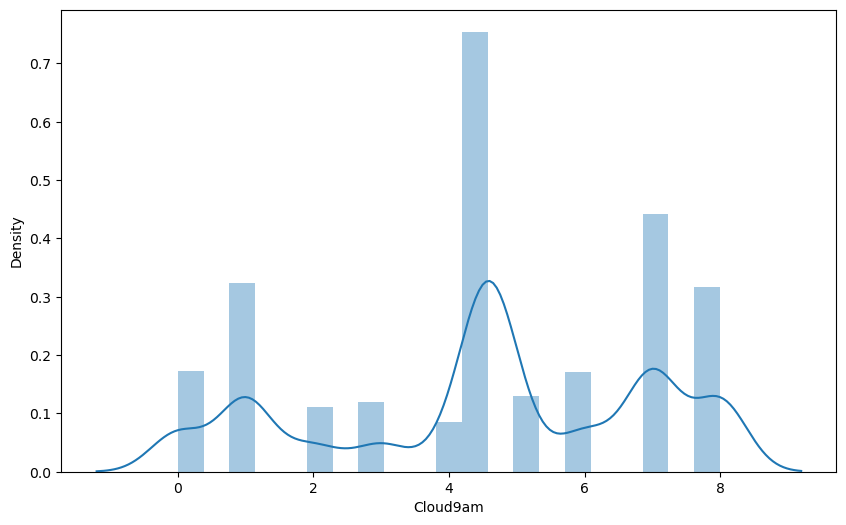

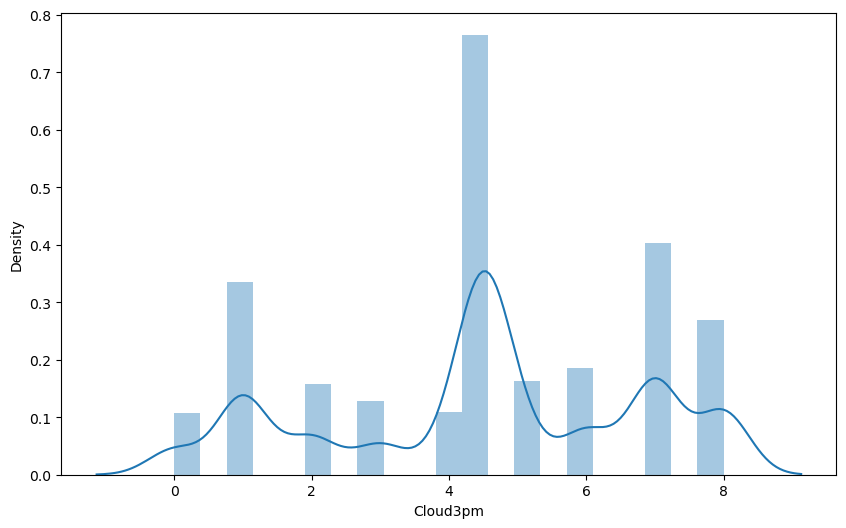

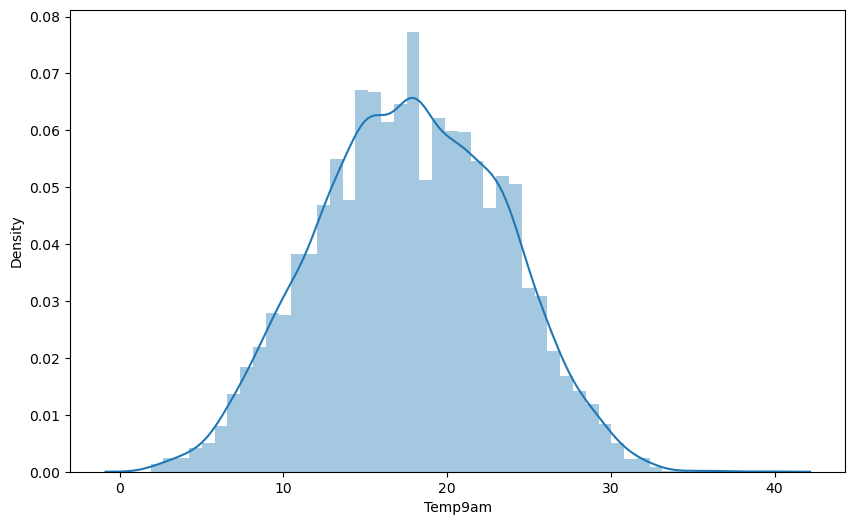

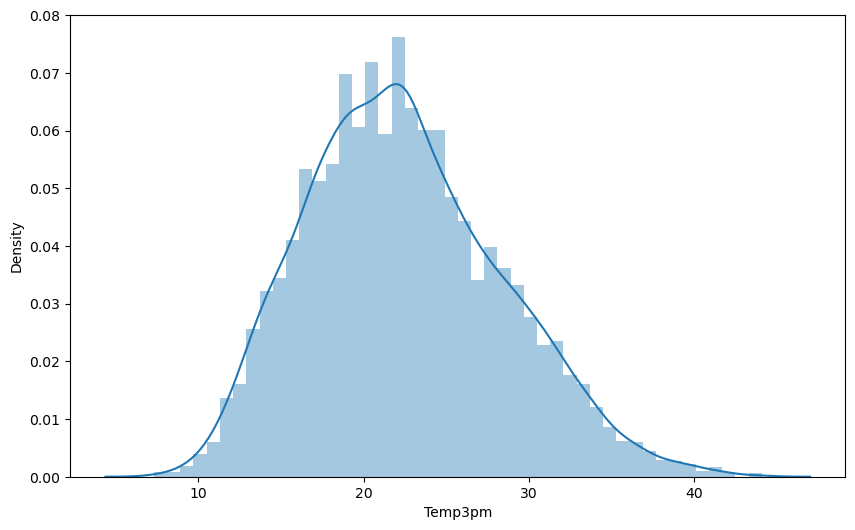

In [30]:
for i in numerical:
    numplot(i)

* The average temperature is between 7 to 18 degree celcius.
* The Evaporation between 10mm to 20mm is very high n the 24 hours to 9am.

In [31]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.379488,6.114516,10.309308,3.852004,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,1.400000,5.389395,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


### Observation:
* Here the rainfall columns has spread data also it may be contains the outliers
* The feature Evaporation,WindGustSpeed,WindSpeed9am and WindSpeed3pm has some outliers.

In [32]:
# Encoding the categorical Data 
from sklearn.preprocessing import LabelEncoder

In [33]:
df1 = df.copy()

In [34]:
le = LabelEncoder()
for i in categorical:
    df1[i] = le.fit_transform(df1[i])


In [35]:
df2 = df1.copy()

Now we have all columns in numerical data type

<AxesSubplot:>

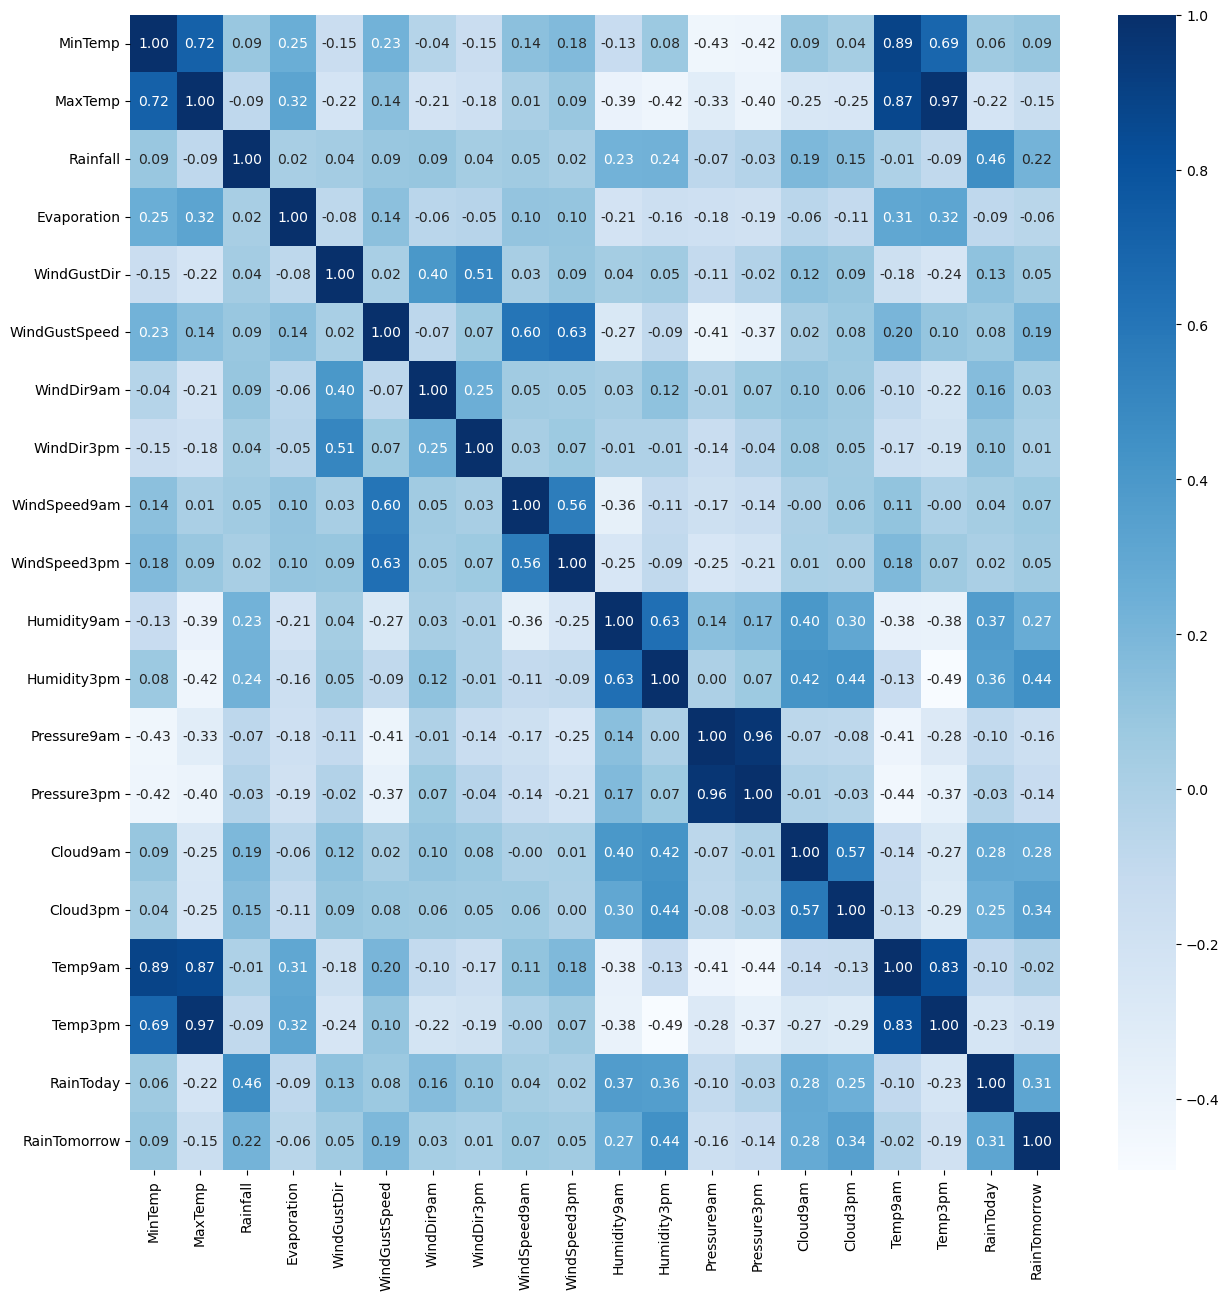

In [36]:
plt.figure(figsize = (15,15))
sns.heatmap(df1.corr(),annot = True,fmt='.2f', cmap = "Blues")

### Observation:
1. MinTemp and maxTemp are highly correlated with Temp9am and temp3pm respectively.
2. Also minTemp and MaxTemp are highly correlated.

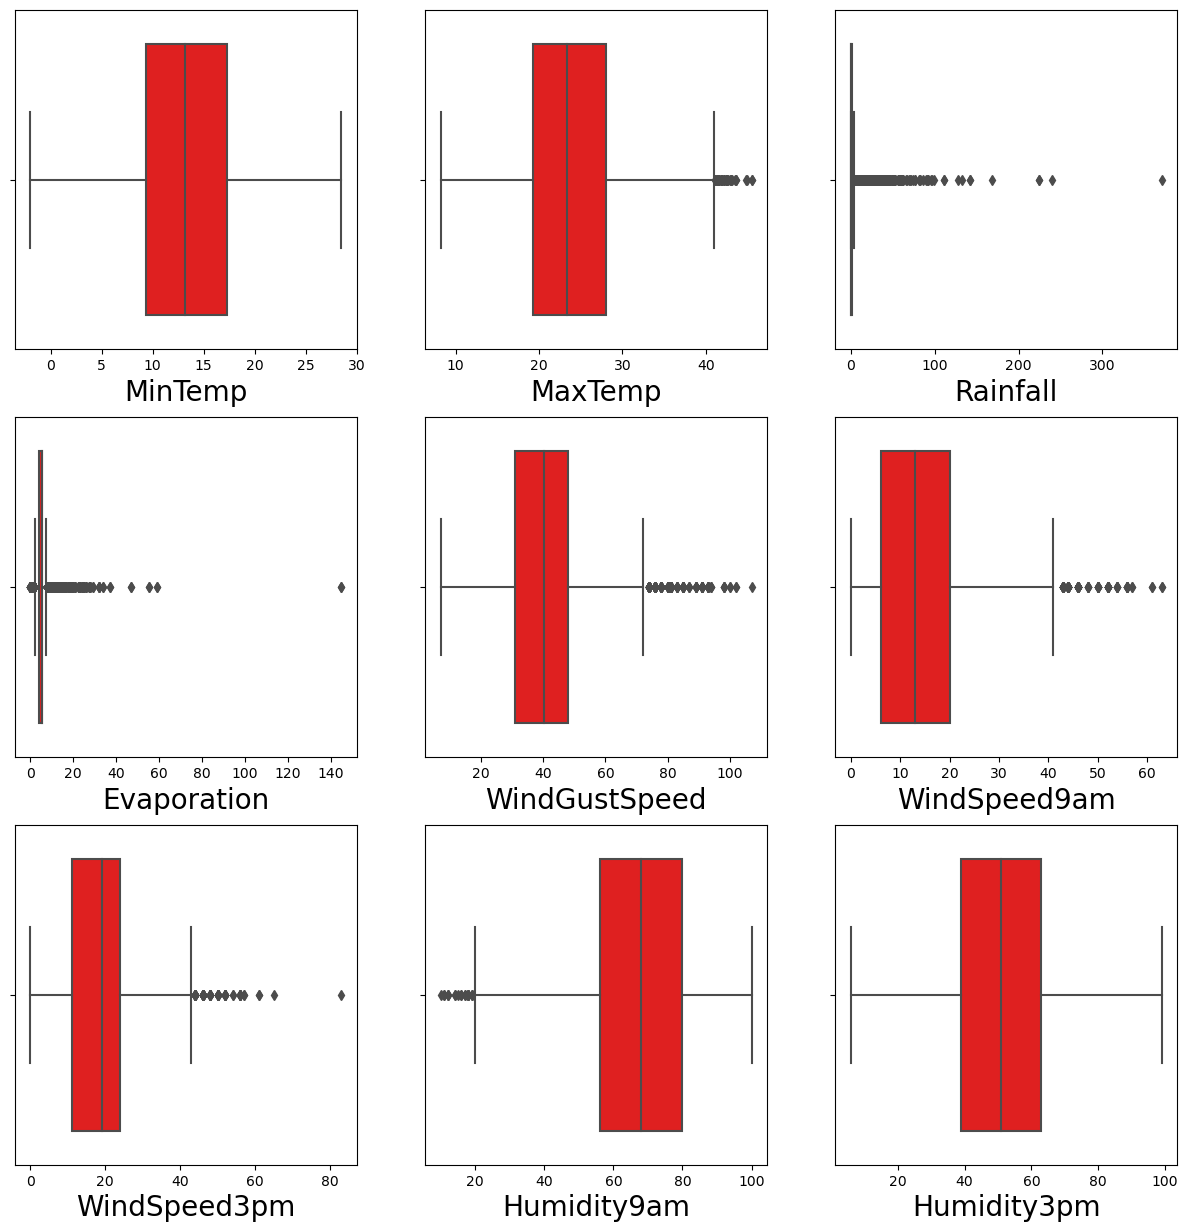

In [37]:
# Outliers Detection and Removal
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

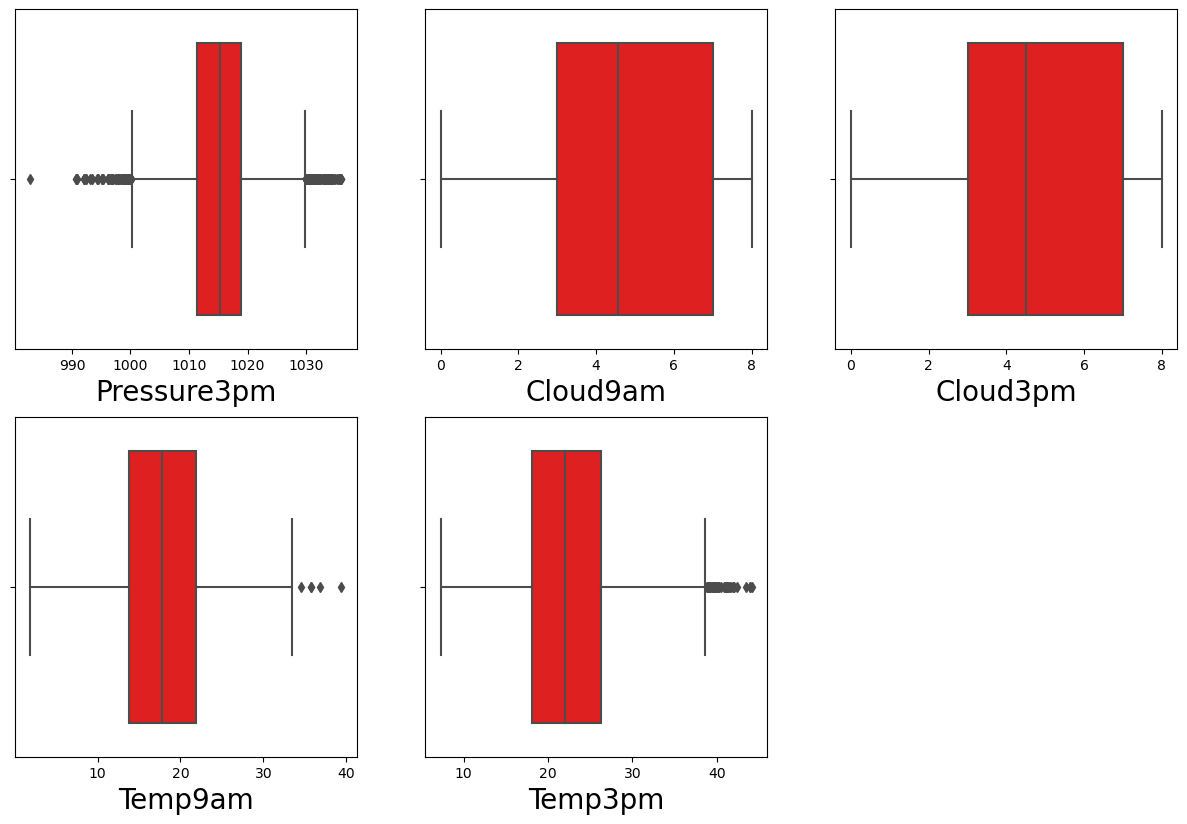

In [38]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for column in numerical[10:]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* OutLiers Exists In the dataset

#### Outliers removal using Zscore method

In [39]:
from scipy.stats import zscore
z = np.abs(zscore(df2))
threshold = 3
df3 = df2[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df2.shape)
print ("Shape of the dataframe after removing outliers: ", df3.shape)
print ("Percentage of data loss post outlier removal: ", (df2.shape[0]-df3.shape[0])/df2.shape[0]*100)


Shape of the dataframe before removing outliers:  (8425, 20)
Shape of the dataframe after removing outliers:  (7987, 20)
Percentage of data loss post outlier removal:  5.198813056379822


In [40]:
df4 = df3.copy()

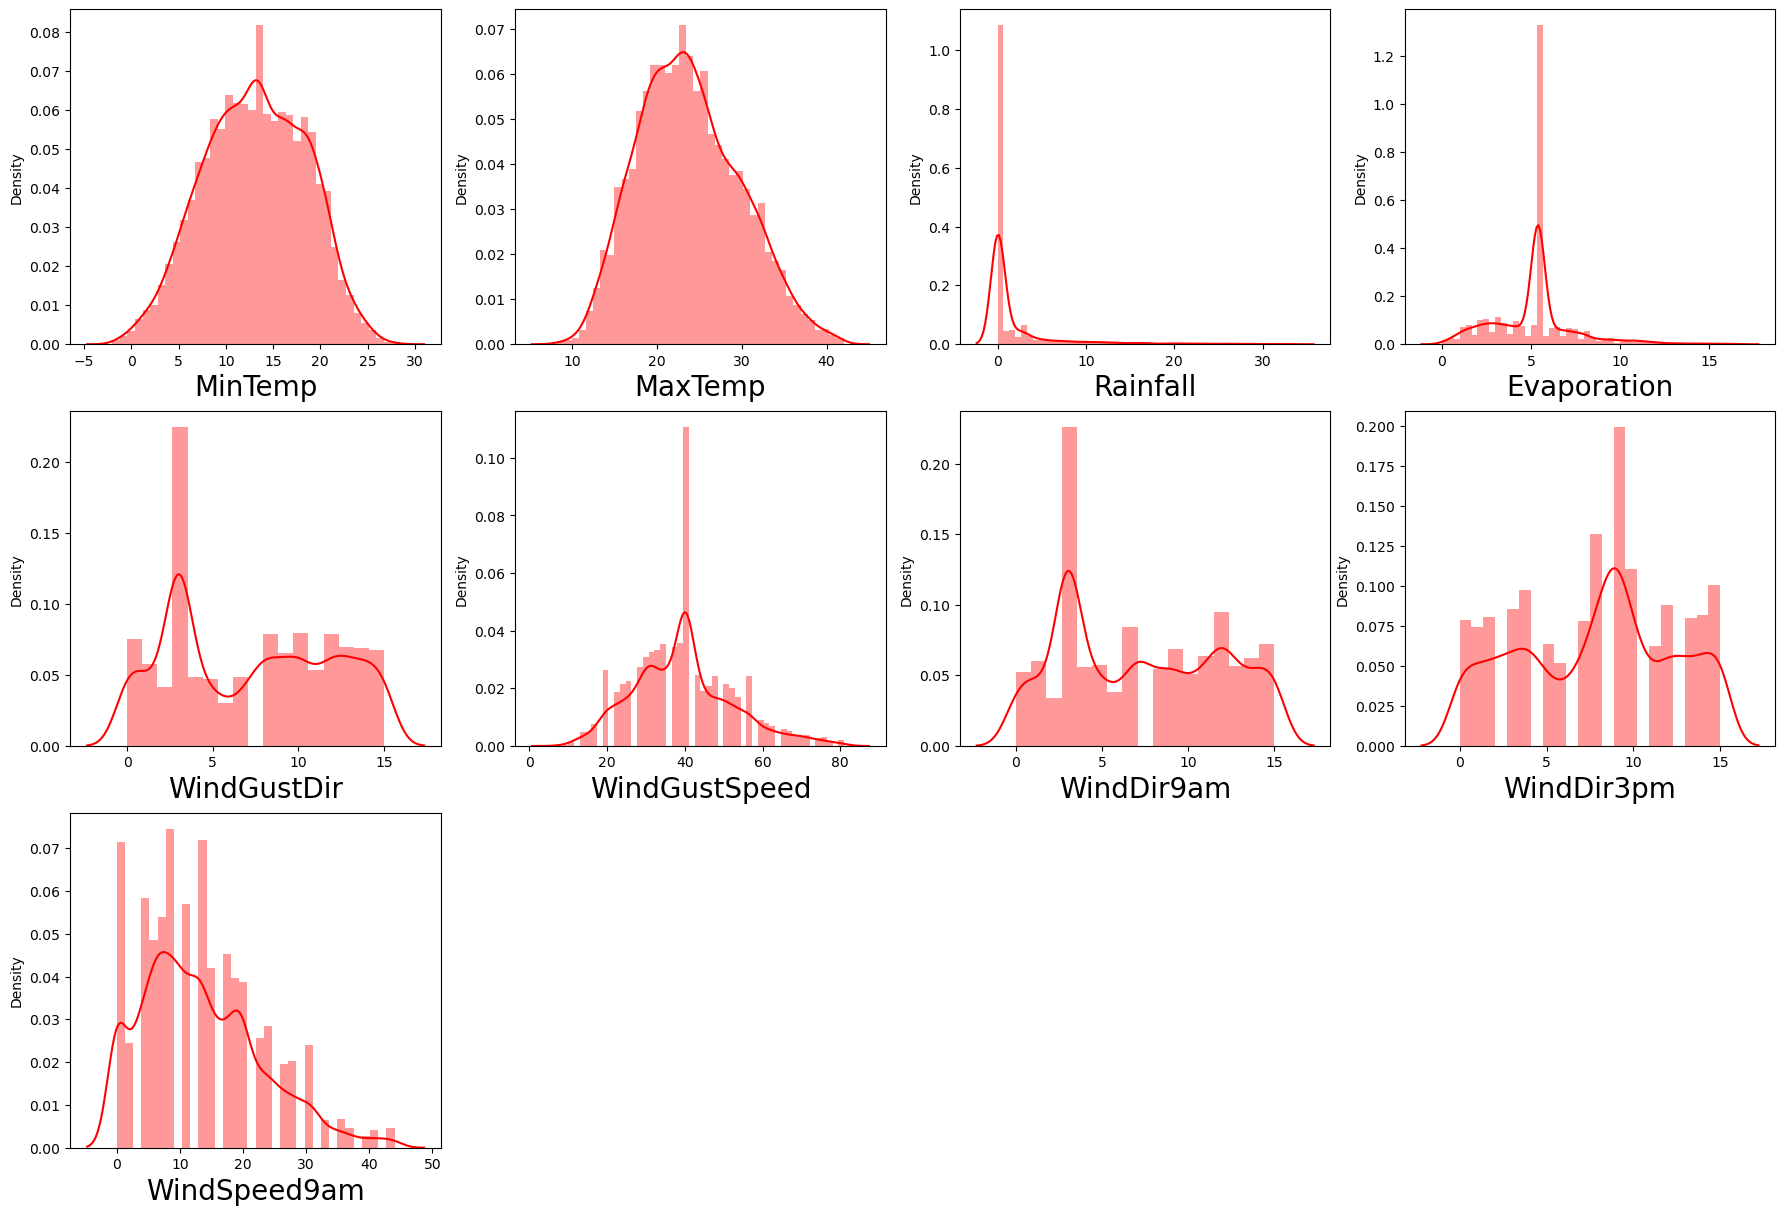

In [41]:
# Skewness of features
cols = df4.columns
plt.figure(figsize=(22,20))
plotnum=1
for col in cols:
    if plotnum<=9:
        plt.subplot(4,4,plotnum)
        sns.distplot(df4[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

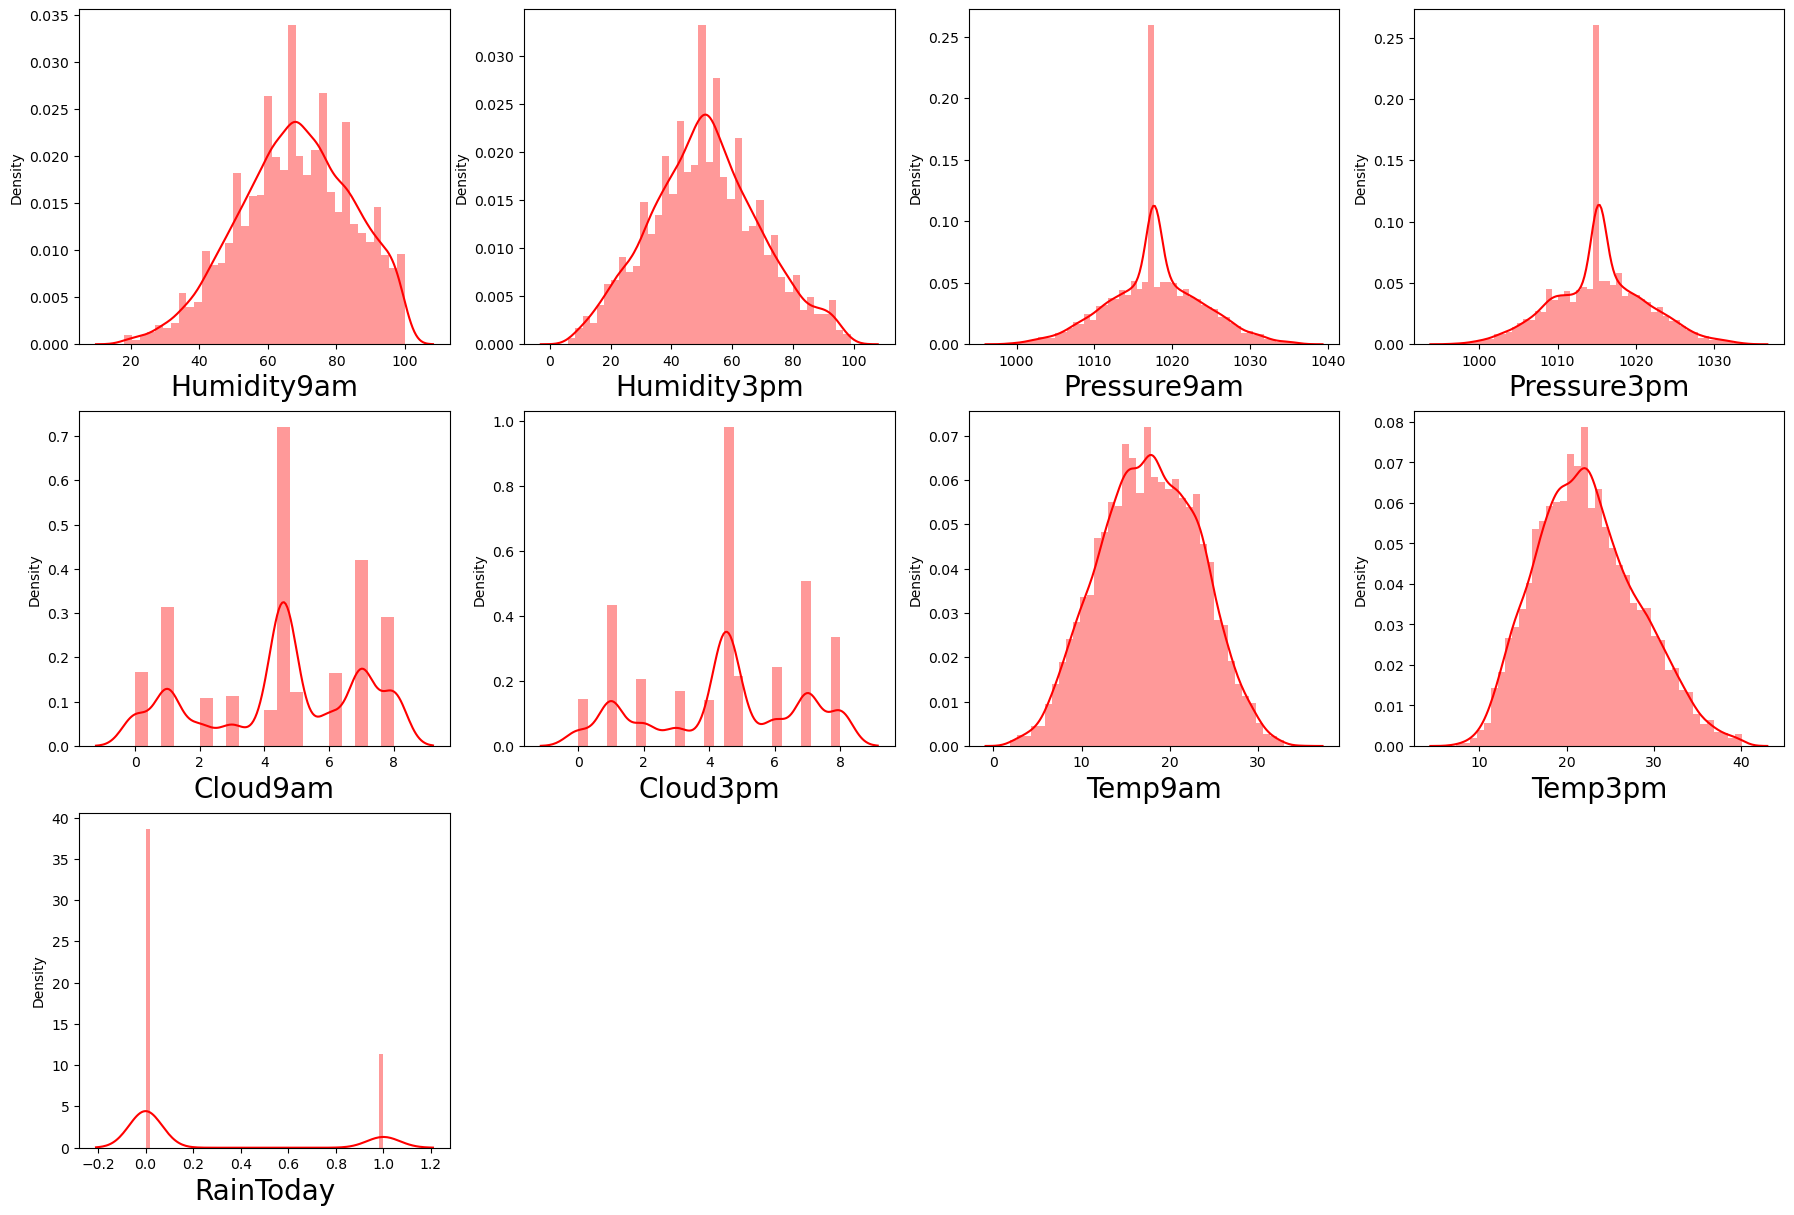

In [42]:
cols = df4.columns
plt.figure(figsize=(22,20))
plotnum=1
for col in cols[10:]:
    if plotnum<=9:
        plt.subplot(4,4,plotnum)
        sns.distplot(df4[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

### Observation:
* Here we can see that the Rainfall feature data is rightskewed
* We can remove skewness with Logtransformation or square root trnsformation
* In this case we are going to use log transformation

In [43]:
df5 = df4.copy()
df5.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
dtype: float64

In [44]:
df5['Rainfall']= np.sqrt(df5['Rainfall'])

In [45]:
df5.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         1.889196
Evaporation      0.846181
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
dtype: float64

* Skewness removed !!!

In [46]:
# Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df5.values,i) for i in range(df5.shape[1])]
vif['Features']= df5.columns
vif

,VIF,Features
0,56.397985,MinTemp
1,435.746865,MaxTemp
2,4.968343,Rainfall
3,8.249905,Evaporation
4,5.325175,WindGustDir
5,23.014378,WindGustSpeed
6,4.717953,WindDir9am
7,6.025378,WindDir3pm
8,5.853063,WindSpeed9am
9,9.438308,WindSpeed3pm


In [47]:
# Dropping Highly correlated features
df5.drop(['Pressure3pm','MaxTemp'],axis = 1,inplace = True)

In [48]:
df5.shape

(7987, 18)

In [49]:
df5.RainTomorrow.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

In [50]:
# Balancing using SMOTE
from imblearn.over_sampling import SMOTE

In [51]:
# Splitting data in target and dependent feature
X = df2.drop(['RainTomorrow'], axis =1)
Y = df2['RainTomorrow']

In [52]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [57]:
Y.value_counts()

0    6434
1    6434
Name: RainTomorrow, dtype: int64

## Standard Scaling

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test, y_train,y_test = train_test_split(X,Y, test_size = .30, random_state = 42)

In [62]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(9007, 19) (9007,) (3861, 19) (3861,)


In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

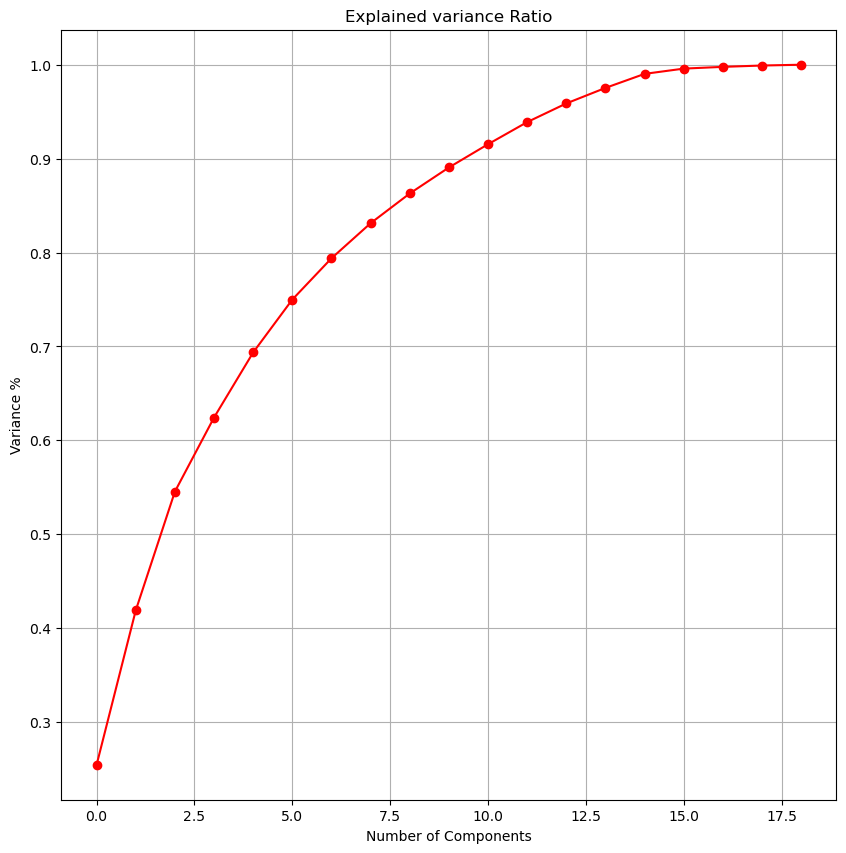

In [64]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_train)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

AS per the graph, we can see that 10 principal components attribute for 90% of variation in the data. We shall pick the 10 components for our prediction.

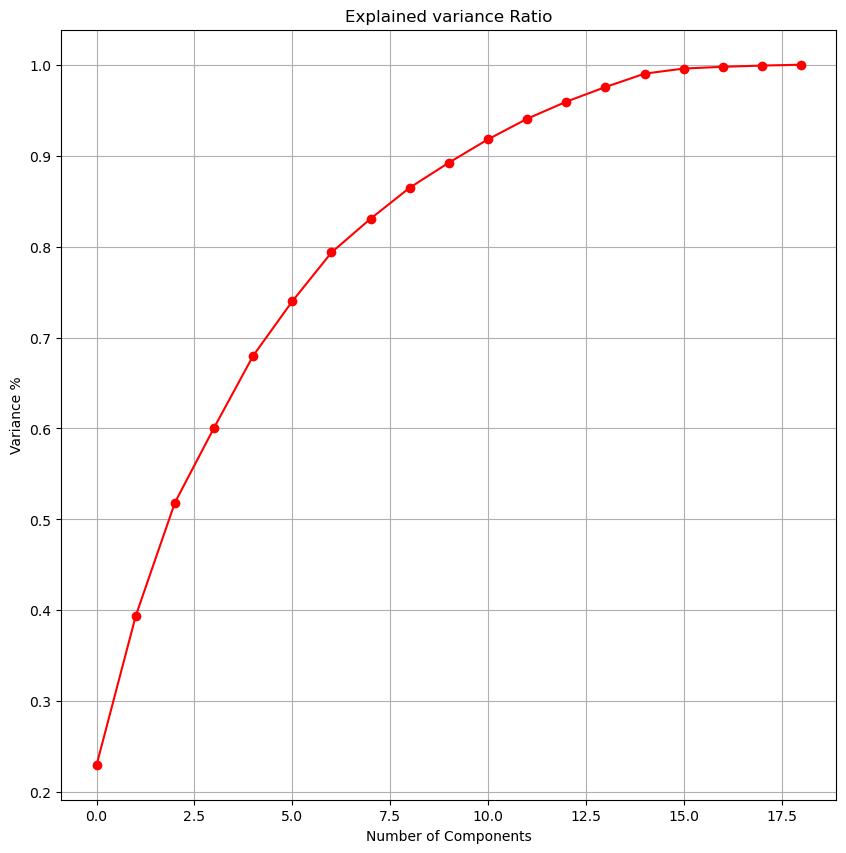

In [65]:
x_pca = pca.fit_transform(X_test)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [66]:
pca_new = PCA(n_components=10)
x_train = pca_new.fit_transform(X_train )
x_test = pca_new.fit_transform(X_test)

In [67]:
train_x=pd.DataFrame(x_train,columns=np.arange(10))
test_x=pd.DataFrame(x_test,columns=np.arange(10))

## Machine Learning Model Building

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [70]:
print('Training feature matrix size:',train_x.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',test_x.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (9007, 10)
Training target vector size: (9007,)
Test feature matrix size: (3861, 10)
Test target vector size: (3861,)


In [71]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(train_x,y_train)
    y_pred=m.predict(test_x)
    print('Classification ML Algorithm Evaluation Matrix',m,'is')
    print('\n')
    print('Accuracy Score :', accuracy_score(y_test, y_pred))
    print('\n')
    print('Confusion matrix :',confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report :',classification_report(y_test, y_pred))
    print('\n')
    print("="*50)

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score : 0.7075887075887076


Confusion matrix : [[1517  435]
 [ 694 1215]]


Classification Report :               precision    recall  f1-score   support

           0       0.69      0.78      0.73      1952
           1       0.74      0.64      0.68      1909

    accuracy                           0.71      3861
   macro avg       0.71      0.71      0.71      3861
weighted avg       0.71      0.71      0.71      3861



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 0.6627816627816627


Confusion matrix : [[1378  574]
 [ 728 1181]]


Classification Report :               precision    recall  f1-score   support

           0       0.65      0.71      0.68      1952
           1       0.67      0.62      0.64      1909

    accuracy                           0.66      3861
   macro avg       0.66      0.66      0.66      3861
weighted avg       0.66      0.66      0.66      3

In [74]:
# CrossValidation :
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('='*50)



Cross Validation Score LogisticRegression() :

Score : [0.77894328 0.71911422 0.65306915 0.75281772 0.80450836]
Mean Score : 0.7416905459268459
Std deviation : 0.05257584852973756




Cross Validation Score SVC() :

Score : [0.76068376 0.71445221 0.65850816 0.77769141 0.80528566]
Mean Score : 0.7433242406425461
Std deviation : 0.05167017387545276




Cross Validation Score GaussianNB() :

Score : [0.75990676 0.71250971 0.64957265 0.72366887 0.76914108]
Mean Score : 0.7229598142928886
Std deviation : 0.04241030409160524




Cross Validation Score DecisionTreeClassifier() :

Score : [0.78166278 0.72571873 0.88539239 0.86047415 0.79246016]
Mean Score : 0.8091416421381444
Std deviation : 0.057344476955338466




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [nan nan nan nan nan]
Mean Score : nan
Std deviation : nan




Cross Validation Score RandomForestClassifier() :

Score : [0.85664336 0.75058275 0.91336441 0.92188107 0.88184998]
Mean Score : 0.864864314767152


In [76]:
Final_mod = LogisticRegression()
Final_mod.fit(train_x,y_train)
y_pred=Final_mod.predict(test_x)
print('Accuracy Score :', accuracy_score(y_test, y_pred))

Accuracy Score : 0.7075887075887076


In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_prob = Final_mod.predict_proba(test_x)[:,1]
y_pred_prob

array([0.51497954, 0.18919483, 0.12160105, ..., 0.4401062 , 0.81258556,
       0.52969276])

In [78]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
print(fpr,tpr,threshold)

[0.         0.         0.         ... 0.98719262 0.98719262 1.        ] [0.00000000e+00 5.23834468e-04 1.04766894e-03 ... 9.99476166e-01
 1.00000000e+00 1.00000000e+00] [       inf 1.         0.99999999 ... 0.0797181  0.07870673 0.02914788]


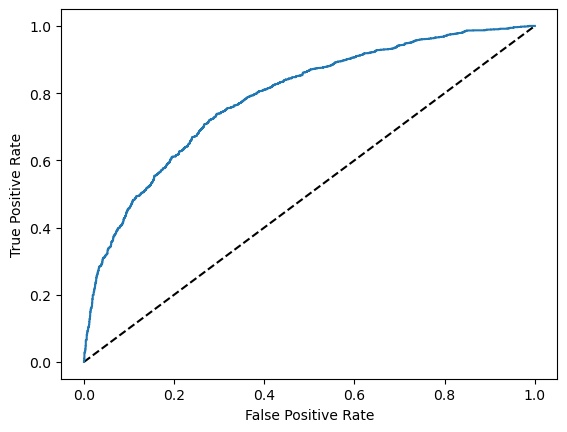

In [79]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [80]:
import joblib
joblib.dump(Final_mod,'weather_forecast.obj')

['weather_forecast.obj']